In [1]:
#% matplotlib notebook
% matplotlib inline
from json2html import *
from quantities import mV, nA
import IPython
import json

import sciunit
from hippounit import models
from hippounit import tests
from hippounit import capabilities

import matplotlib.pyplot as plt

from PyNeuronToolbox.morphology import shapeplot
from mpl_toolkits.mplot3d import Axes3D

from neuron import h



In [2]:
# Load target data

observation=json.load(open('depol_block_target_data.json'))
IPython.display.HTML(json2html.convert(json = observation))

mean_Veq,-40.1*mV
Ith_std,0.3*nA
Veq_std,3.4*mV
mean_Ith,0.6*nA


In [3]:
#so that python can interpret quantities
for key, value in observation.iteritems():
		observation[key] = eval(value)
print observation

{u'mean_Veq': array(-40.1) * mV, u'Ith_std': array(0.3) * nA, u'Veq_std': array(3.4) * mV, u'mean_Ith': array(0.6) * nA}


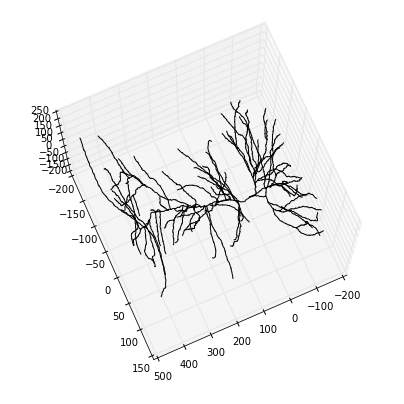

'\nfrom neurom import load_neuron\nfrom neurom import viewer\nmorph_path = "/home/osboxes/bsp_data_repository-master/optimizations/CA1_pyr_cAC_12AUG16/morphology/dend-050921AM2_axon-051208AM2.asc"\nviewer.draw(load_neuron(morph_path));\n'

In [4]:
#Load and visualize cell model
model = models.Model()

# outputs will be saved in folders named like this:
model.name="Kali"

# path to mod files
model.modelpath = "./hippounit/models/hoc_models/Kali_Freund_modell/scppinput/"

# if this doesn't exist mod files are automatically compiled
model.libpath = "x86_64/.libs/libnrnmech.so.0"

# path to hoc file
# the model must not display any GUI!!
model.hocpath = "./hippounit/models/hoc_models/Kali_Freund_modell/scppinput/ca1_syn.hoc"

# If the hoc file doesn't contain a template, this must be None
model.template_name = None

# should be None, if there is no Section List in the model for the soma
model.SomaSecList_name = None

# if the soma is not in a section list, add its name here:
#model.soma = 'soma'

model.load_mod_files() #This automatically compiles mod files, if they are not yet compiled
model.initialise() # Loads the model, creates stand alone cell from template. 
# uses the soma section list to set the location of somatic stimuli (and measurement)
# If the given section list contains more elements, the last one is used


# use this to visualize hoc morphology

plt.figure(figsize=(7,7))
shapeax = plt.subplot(111, projection='3d')
shapeax.view_init(75,66)
shapeplot(h,shapeax)
plt.show()


'''
from neurom import load_neuron
from neurom import viewer
morph_path = "/home/osboxes/bsp_data_repository-master/optimizations/CA1_pyr_cAC_12AUG16/morphology/dend-050921AM2_axon-051208AM2.asc"
viewer.draw(load_neuron(morph_path));
'''

In [5]:
# Set the test
#The vectors of the somatic and dendritic voltage values are saved in files during the simulation. 
#If force_run=False, and the files already exist, the test uses the saved files for further calculations 
#If force_run=True, or the files don't exist, the test runs the whole simulation.
show_plot=True
test = tests.DepolarizationBlockTest(observation, force_run=False, show_plot=show_plot)

# Set the number of processes running parallel
import multiprocessing
test.npool = multiprocessing.cpu_count() - 1

- running amplitude: 0.0
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.1
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.2
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.3
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.4
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.5
- running amplitude: 0.6
- running model Kali stimulus at:  soma ( 0.5 )
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.15
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.35
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.25
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.05
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.55
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.65
- running model Kali stimulus at:  soma ( 0.5 )
- running amplitude: 0.45
- running model Kal

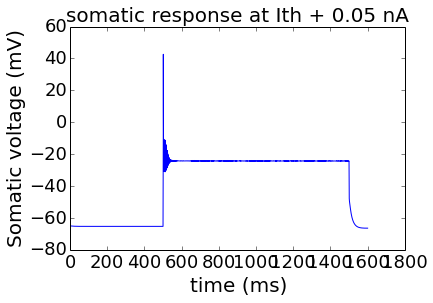

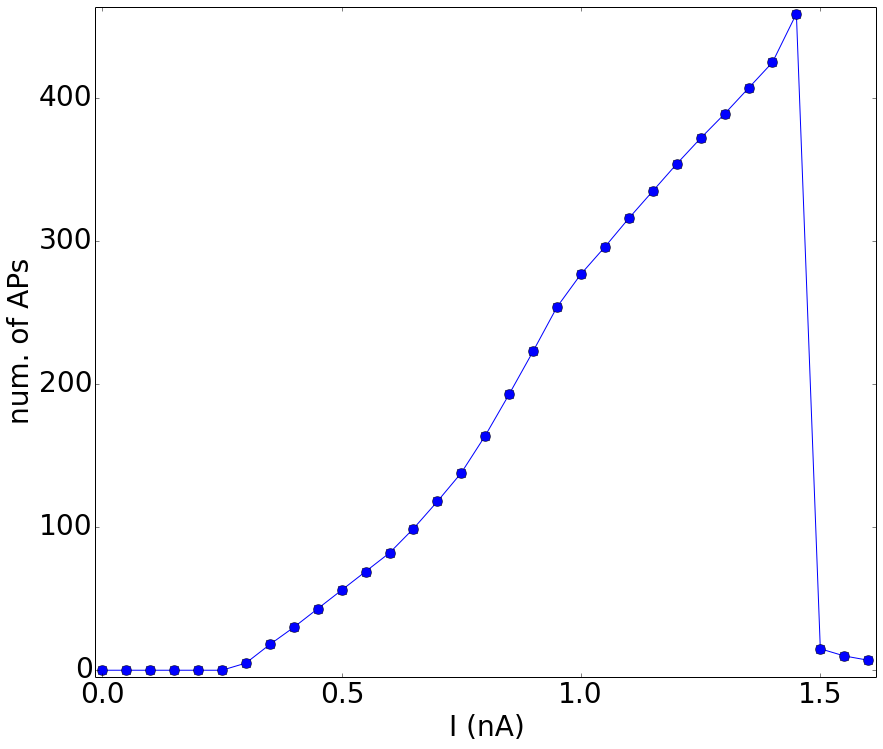

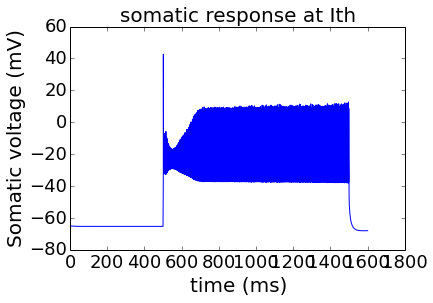

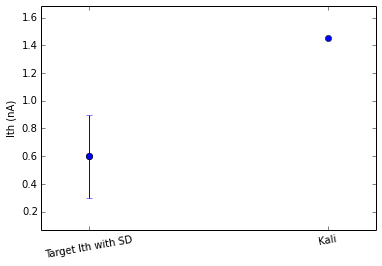

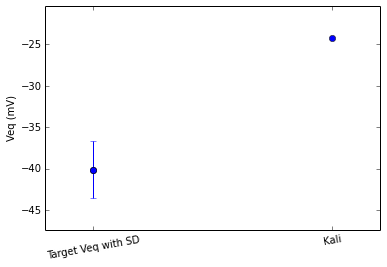

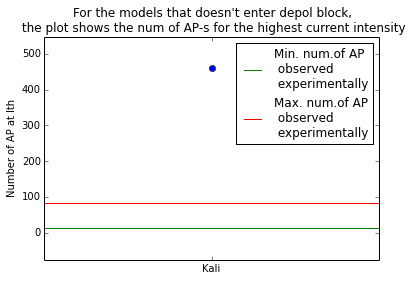

In [6]:
# Run the test
# Call SciUnit's judge function. 
#This calls the generate_prediction function of the test to generate prediction (data of model behaviour)
#Also calls the compute_score function of the test to calculate the error
score = test.judge(model)

In [7]:
# Visualize model feature values in a table
for key, value in score.prediction.iteritems():
		score.prediction[key] = str(value)
               
IPython.display.HTML(json2html.convert(json = score.prediction))

model_Ith,1.45 nA
model_Veq,-24.2830490674 mV


In [8]:
#Summarize and print the score achieved by the model on the test using SciUnit's summarize function
score.summarize()

=== Model Kali (Model) achieved score Z_Ith = 2.83, Z_Veq = 4.65 on test 'Depolarization block test (DepolarizationBlockTest)'. ===
